In [2]:
import pandas as pd
import os.path
import geopandas as gpd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the PEP725 dataset

data_dir = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725\pep725_outputs"
dataset = os.path.join(data_dir, 'PEP725_buffers.geojson')
gdf = gpd.read_file(dataset) # Because columns have mixed data types, pandas suggested to use low_memory=False  

# Check the dimensions of the dataframe
gdf.shape

(129329, 14)

In [4]:
gdf = gdf.loc[gdf.year == 2017].sort_values(by='day', ascending=False)
gdf.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
23591,4990,13.90000,53.3167,40,33,2120200,Quercus,Quercus robur,95,2017,345,2017-12-11,DBL,"POLYGON ((830315.51129 5918703.42977, 830296.2..."
23589,3260,7.63333,47.8167,270,291,2120200,Quercus,Quercus robur,95,2017,339,2017-12-05,DBL,"POLYGON ((401692.89428 5296831.73855, 401673.6..."
23590,8128,9.71667,54.7667,35,39,2120200,Quercus,Quercus robur,95,2017,339,2017-12-05,DBL,"POLYGON ((550109.54591 6069066.08415, 550090.2..."
23586,1948,8.60000,49.8000,100,102,2120200,Quercus,Quercus robur,95,2017,338,2017-12-04,DBL,"POLYGON ((475214.46206 5516470.92103, 475195.2..."
23587,3474,8.80000,47.9833,650,642,2120200,Quercus,Quercus robur,95,2017,338,2017-12-04,DBL,"POLYGON ((489076.08813 5314463.44328, 489056.8..."


array([[<AxesSubplot: title={'center': 'day'}>]], dtype=object)

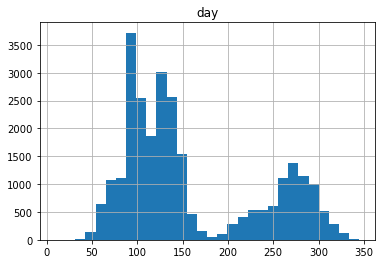

In [6]:
gdf.hist(column='day', bins=30, grid=True)

In [5]:
gdf['day'].value_counts()

92     454
91     449
93     439
100    403
94     400
      ... 
345      1
33       1
34       1
35       1
9        1
Name: day, Length: 311, dtype: int64

In [33]:
buffers_day_92_WGS84 = gdf.loc[gdf.day == 92]
buffers_day_92

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
3861,21405,11.81670,53.5833,55,56,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((690450.22426 5940850.35428, 690430.9..."
118778,5054,12.55000,53.0667,50,57,10000,perm_grass,None,182,2017,92,2017-04-02,M,"POLYGON ((741832.25319 5885583.11429, 741812.9..."
113484,19310,6.93333,51.1500,40,42,2030100,Picea,Picea abies,10,2017,92,2017-04-02,EC,"POLYGON ((359457.33437 5668536.24921, 359438.0..."
3851,20640,12.23330,47.9667,475,472,1050100,Alnus,Alnus glutinosa,11,2017,92,2017-04-02,DBL,"POLYGON ((745331.68250 5317659.34639, 745312.4..."
3852,21391,7.13333,50.6333,220,185,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((371991.30040 5610710.49004, 371972.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,4822,14.58330,51.7333,80,66,1180100,Betula,Betula pendula,60,2017,92,2017-04-02,DBL,"POLYGON ((889427.77290 5746140.85974, 889408.5..."
3712,4846,13.05000,53.0333,70,57,2290100,Sorbus,Sorbus aucuparia,11,2017,92,2017-04-02,DBL,"POLYGON ((775525.27089 5883647.87045, 775506.0..."
3713,4851,14.65000,51.8833,55,46,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((892733.03840 5763159.77615, 892713.7..."
3714,4851,14.65000,51.8833,55,46,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((892733.03840 5763159.77615, 892713.7..."


In [18]:
# Make a function for quick plotting
# Load the lowres map of gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('EPSG:32632')

def germany_plot(geodataframe, basemap):  
    
    # Restrict the boundary to germany
    ax = basemap[basemap.name == 'Germany'].plot(color='gray', figsize=(10,10))
    # Plot the data
    geodataframe.plot(ax=ax, color='green')

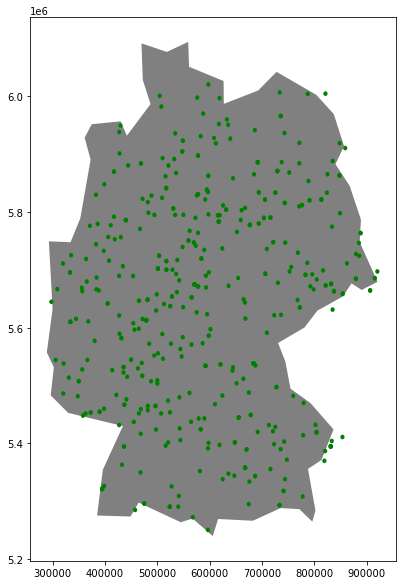

In [24]:
germany_plot(gdf.loc[gdf.day == 92], world)

2017

High Count
- Day 92: April 2
- Day 91: April 1
- Day 93: April 3
- Day 100: April 10

Low Count
- Day 33: February 2
- Day 34: February 3
- Day 345: December 11

In [15]:
output_folder = os.path.join(data_dir, "pep725_high_count_days")

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

#buffers_day_92_WGS84.to_file(os.path.join(output_folder, "buffers_day_92_WGS84.geojson"), driver='GeoJSON')


In [39]:
buffers_day_92_WGS84.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
3861,21405,11.81670,53.5833,55,56,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((690450.22426 5940850.35428, 690430.9..."
118778,5054,12.55000,53.0667,50,57,10000,perm_grass,None,182,2017,92,2017-04-02,M,"POLYGON ((741832.25319 5885583.11429, 741812.9..."
113484,19310,6.93333,51.1500,40,42,2030100,Picea,Picea abies,10,2017,92,2017-04-02,EC,"POLYGON ((359457.33437 5668536.24921, 359438.0..."
3851,20640,12.23330,47.9667,475,472,1050100,Alnus,Alnus glutinosa,11,2017,92,2017-04-02,DBL,"POLYGON ((745331.68250 5317659.34639, 745312.4..."
3852,21391,7.13333,50.6333,220,185,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((371991.30040 5610710.49004, 371972.0..."


In [30]:
buffers_day_92_WGS84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
buffers_day_92 = buffers_day_92_WGS84.to_crs(crs='EPSG:32632')

In [38]:
buffers_day_92.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
3861,21405,11.81670,53.5833,55,56,1010300,Acer,Acer platanoides,60,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
118778,5054,12.55000,53.0667,50,57,10000,perm_grass,None,182,2017,92,2017-04-02,M,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
113484,19310,6.93333,51.1500,40,42,2030100,Picea,Picea abies,10,2017,92,2017-04-02,EC,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
3851,20640,12.23330,47.9667,475,472,1050100,Alnus,Alnus glutinosa,11,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
3852,21391,7.13333,50.6333,220,185,1580100,Fraxinus,Fraxinus excelsior,60,2017,92,2017-04-02,DBL,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."


In [32]:
buffers_day_92.to_file(os.path.join(output_folder, "buffers_day_92.geojson"), driver='GeoJSON')

## Exporting the stations for the same day to do some analysis

In [17]:
stations = gpd.read_file(os.path.join(data_dir, "PEP725_stations.geojson"))
stations.tail()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
129324,5456,13.75000,50.7333,875,864,10000,perm_grass,None,131,2021,244,2021-09-01,M,POINT Z (835136.405 5630933.921 875.000)
129325,961,7.50000,52.7667,30,33,10000,perm_grass,None,111,2021,257,2021-09-14,M,POINT Z (398795.749 5847373.189 30.000)
129326,20595,8.50000,49.4667,95,86,10000,perm_grass,None,131,2021,258,2021-09-15,M,POINT Z (463771.720 5479458.856 95.000)
129327,19312,8.36667,48.6000,490,622,10000,perm_grass,None,131,2021,285,2021-10-12,M,POINT Z (453306.954 5383184.811 490.000)
129328,8197,10.98330,48.2333,525,504,10000,perm_grass,None,111,2021,289,2021-10-16,M,POINT Z (647273.716 5344132.606 525.000)


In [19]:
stations_2017 = stations.loc[stations.year == 2017]
stations_2017.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
0,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000)
1,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (397567.206 5732416.903 60.000)
2,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (477094.080 5488647.767 140.000)
3,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (470138.525 5538713.881 100.000)
4,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (419374.473 5728316.443 60.000)


In [11]:
stations_2017.crs

In [16]:
stations_2017.loc[stations_2017.day == 92].to_file(os.path.join(output_folder, "stations_day_92.geojson"), driver='GeoJSON')